# Estadítisca descriptiva

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\JUAN\anaconda3\envs\envML\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
data = pd.read_csv("../data/interim/loan_cleaned.csv")
data.head()

C:\Users\JUAN\AppData\Local\Temp\ipykernel_21508\1135337138.py:1: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/interim/loan_cleaned.csv")


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,desc
0,5000.0,5000.0,4975.0,36,10.65,162.87,b,b,NaN,10.0,...,171.62,NaN,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added need upgrade business technologies
1,2500.0,2500.0,2500.0,60,15.27,59.83,c,c,ryder,1.0,...,119.66,NaN,2013-09-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added plan use money finance motorcyc...
2,2400.0,2400.0,2400.0,36,15.96,84.33,c,c,NaN,10.0,...,649.91,NaN,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36,13.49,339.31,c,c,air resources board,10.0,...,357.48,NaN,2015-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added pay property tax borrow friend ...
4,3000.0,3000.0,3000.0,60,12.69,67.79,b,b,university medical group,1.0,...,67.79,2016-02-01,2016-01-01,0.0,individual,0.0,NaN,NaN,NaN,borrower added plan combining three large inte...


[]

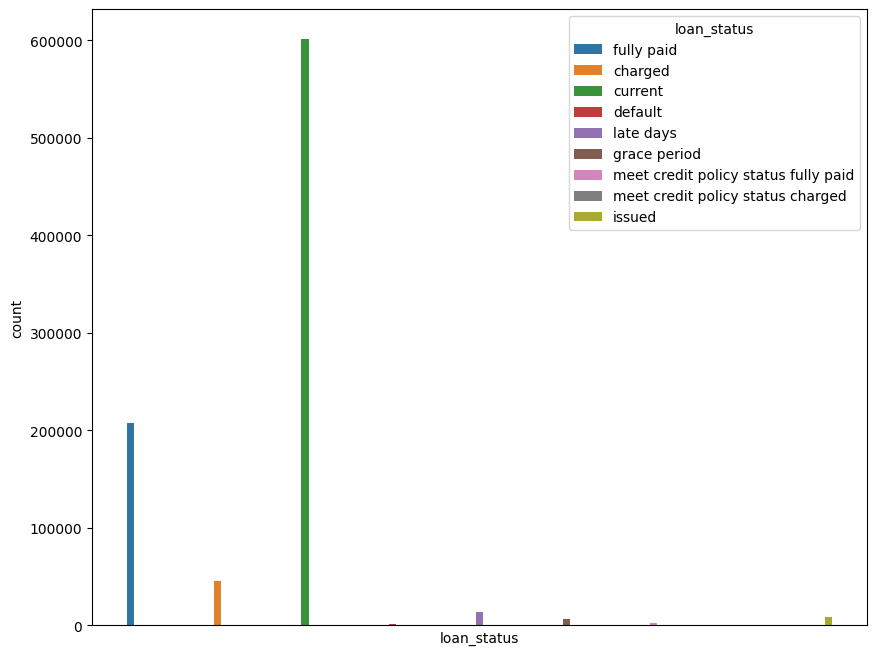

In [29]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="loan_status", hue="loan_status")
plt.xticks([])
plt.plot()

[]

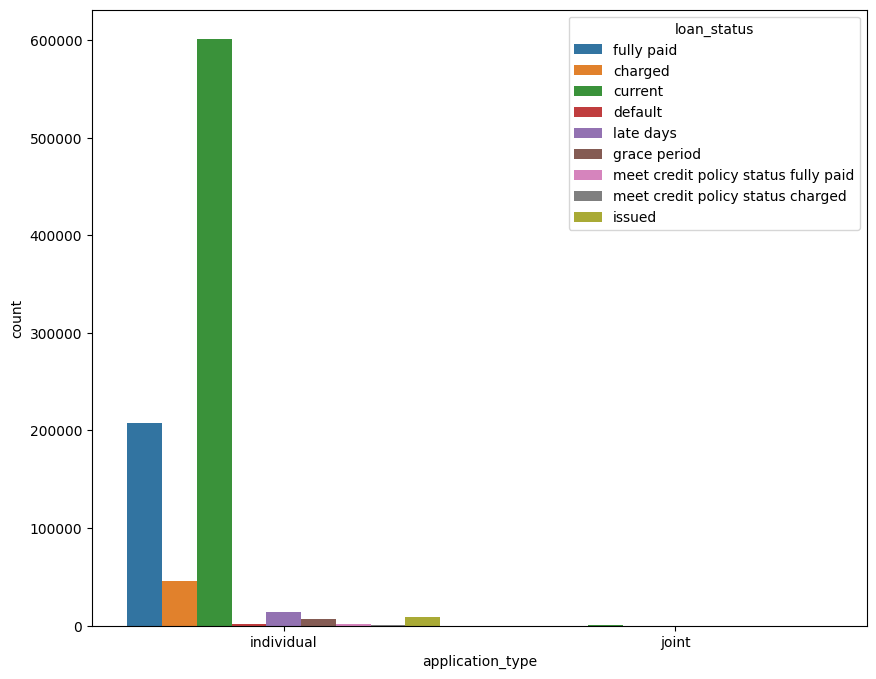

In [6]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="application_type", hue="loan_status")
plt.plot()

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data, x="application_type", hue="loan_status")
plt.plot()